TASK: F1-SCORE IMPLEMENTATION FROM SCRATCH

Loading Iris Dataset...
Original dataset shape: (150, 4)
Original target distribution:
  Class 0 (setosa): 50 samples
  Class 1 (versicolor): 50 samples
  Class 2 (virginica): 50 samples

Creating imbalanced dataset for demonstration...
Imbalanced dataset shape: (95, 4)
Imbalanced target distribution:
  Class 0 (setosa): 50 samples
  Class 1 (versicolor): 30 samples
  Class 2 (virginica): 15 samples

EXPERIMENTS WITH DIFFERENT CONFIGURATIONS

Dataset: Original_Balanced
----------------------------------------

Split: 80:10:10

MODEL: Original_Balanced_80:10:10_Baseline
Training set distribution:
  Class 0 (setosa): 40 samples
  Class 1 (versicolor): 40 samples
  Class 2 (virginica): 39 samples

Regression Metrics:
Training   - MSE: 0.0439, R²: 0.9339
Validation - MSE: 0.0535, R²: 0.9218
Test       - MSE: 0.0658, R²: 0.9014

Classification Metrics (rounded predictions):
Training   - Accuracy: 0.9748
Validation - Accuracy: 0.9375
Test       - A

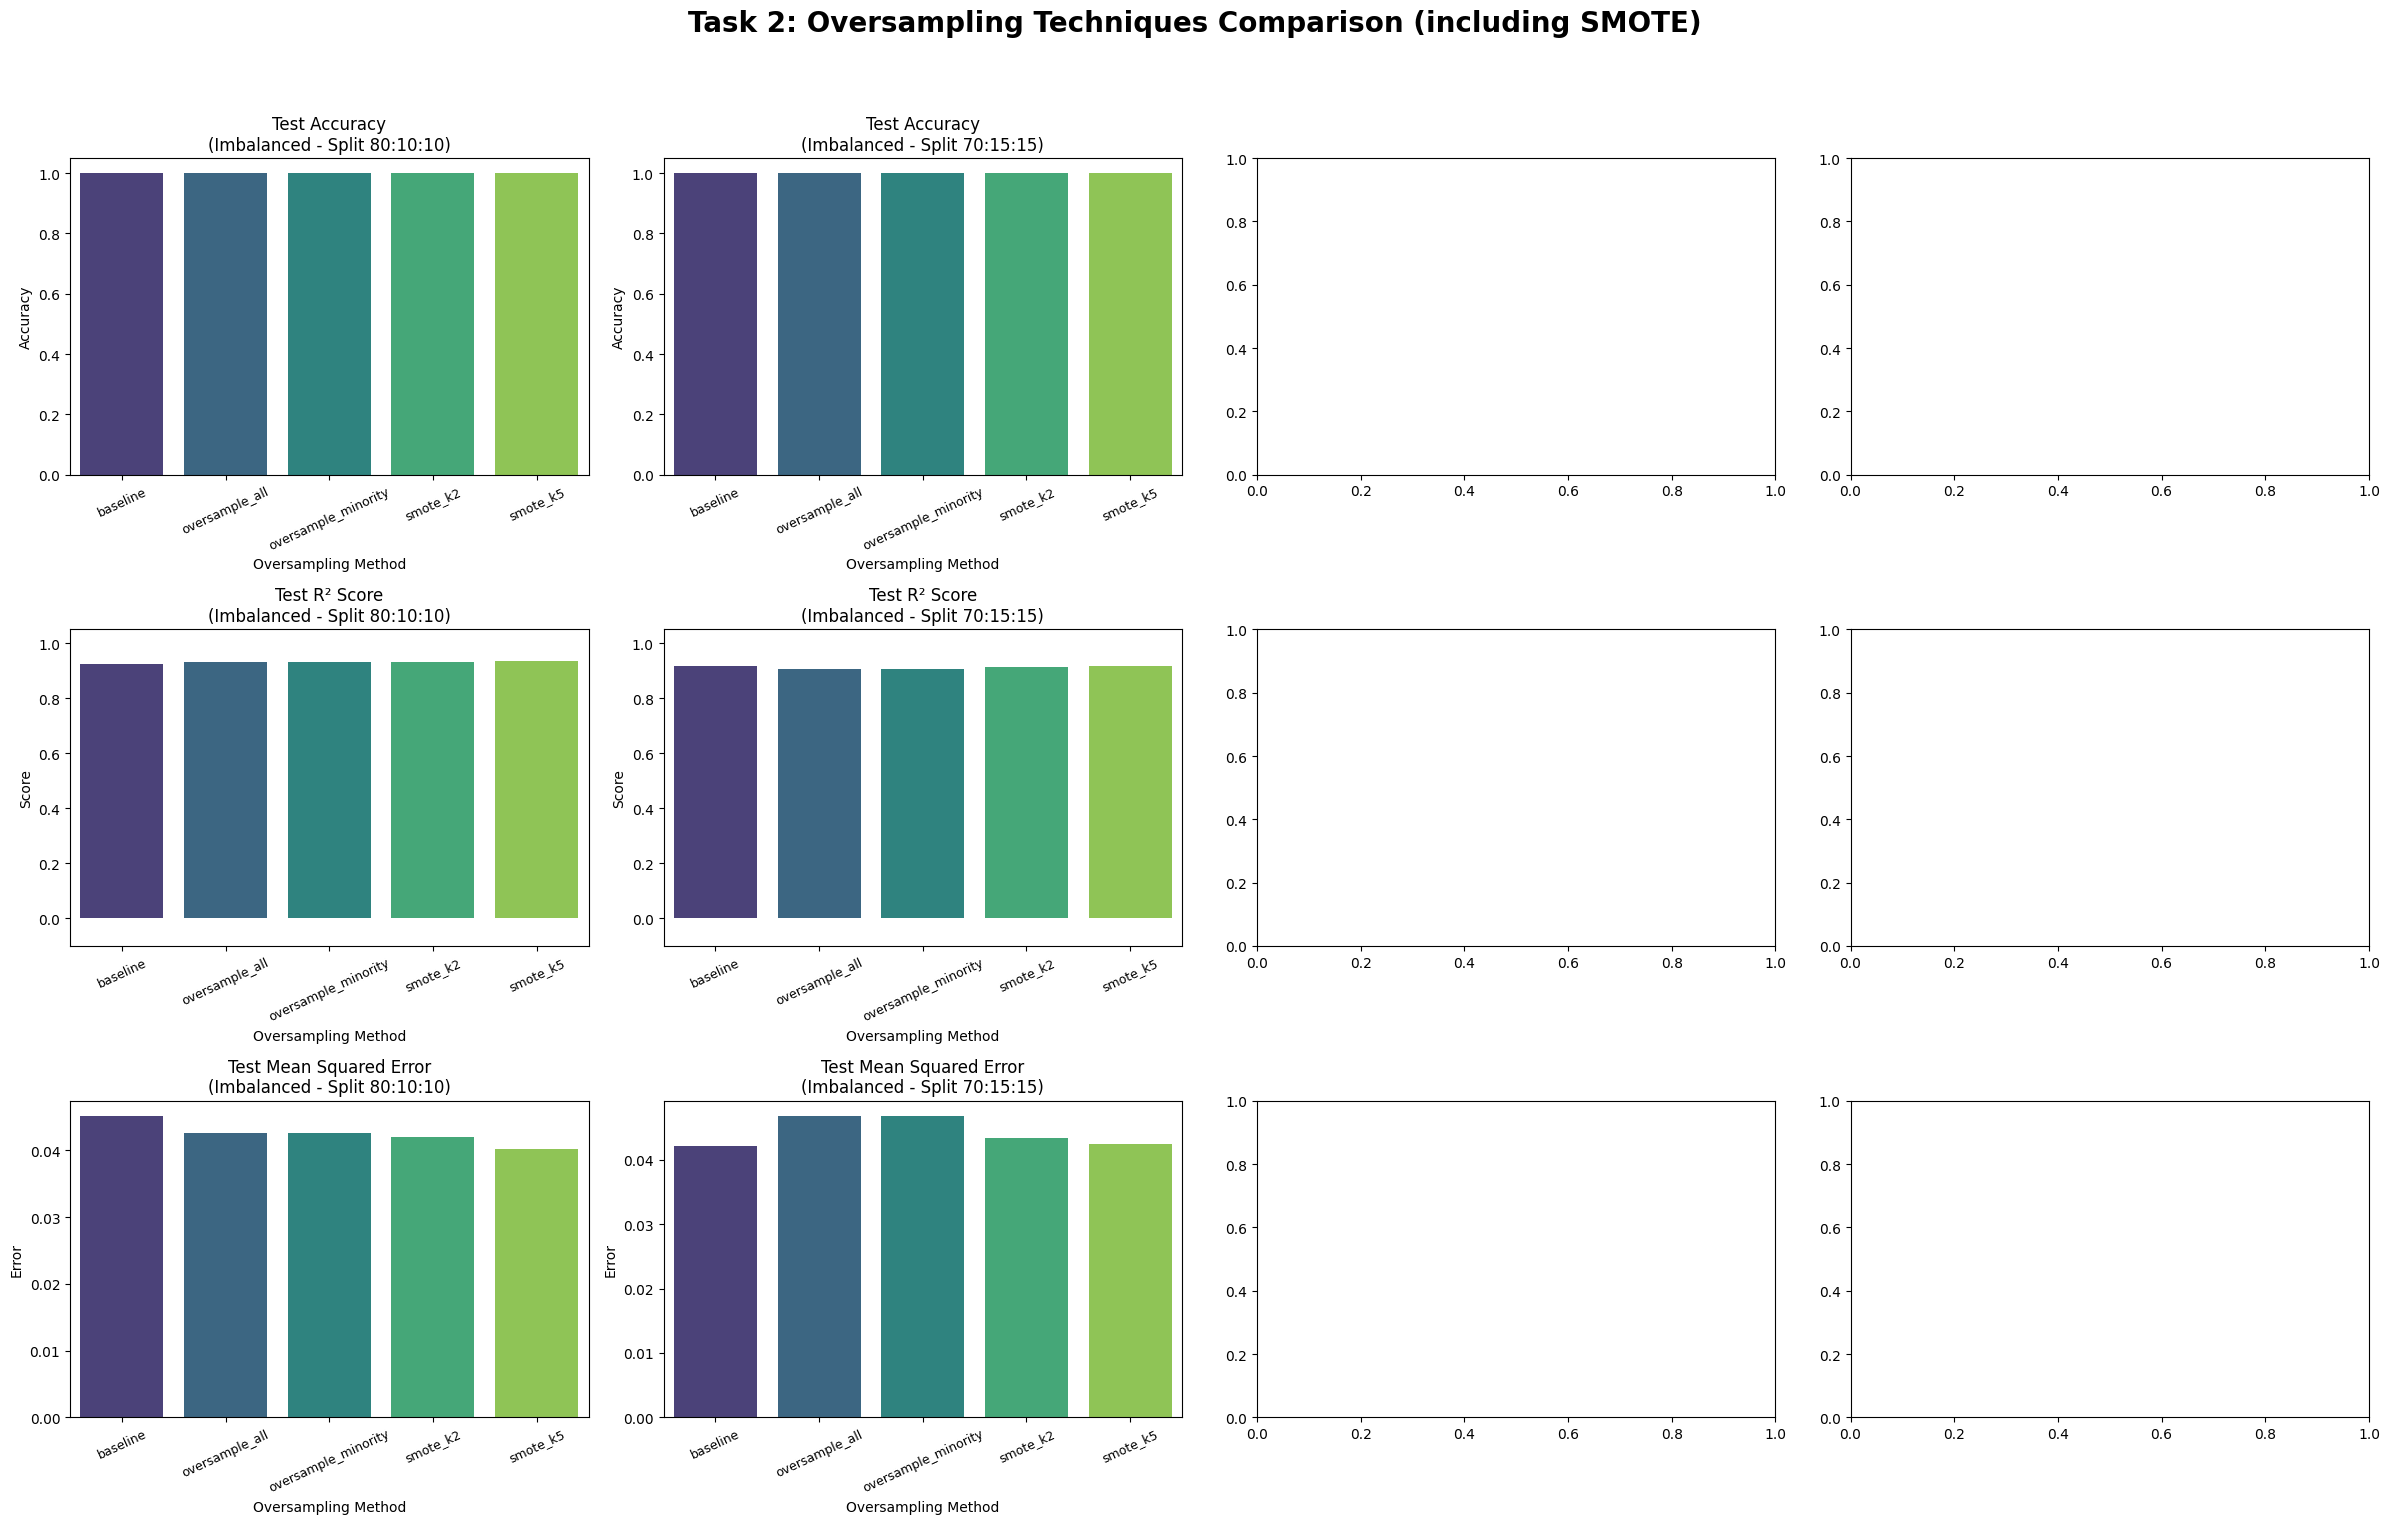


CONFUSION MATRIX VISUALIZATION (Imbalanced Dataset, 80:10:10 Split)


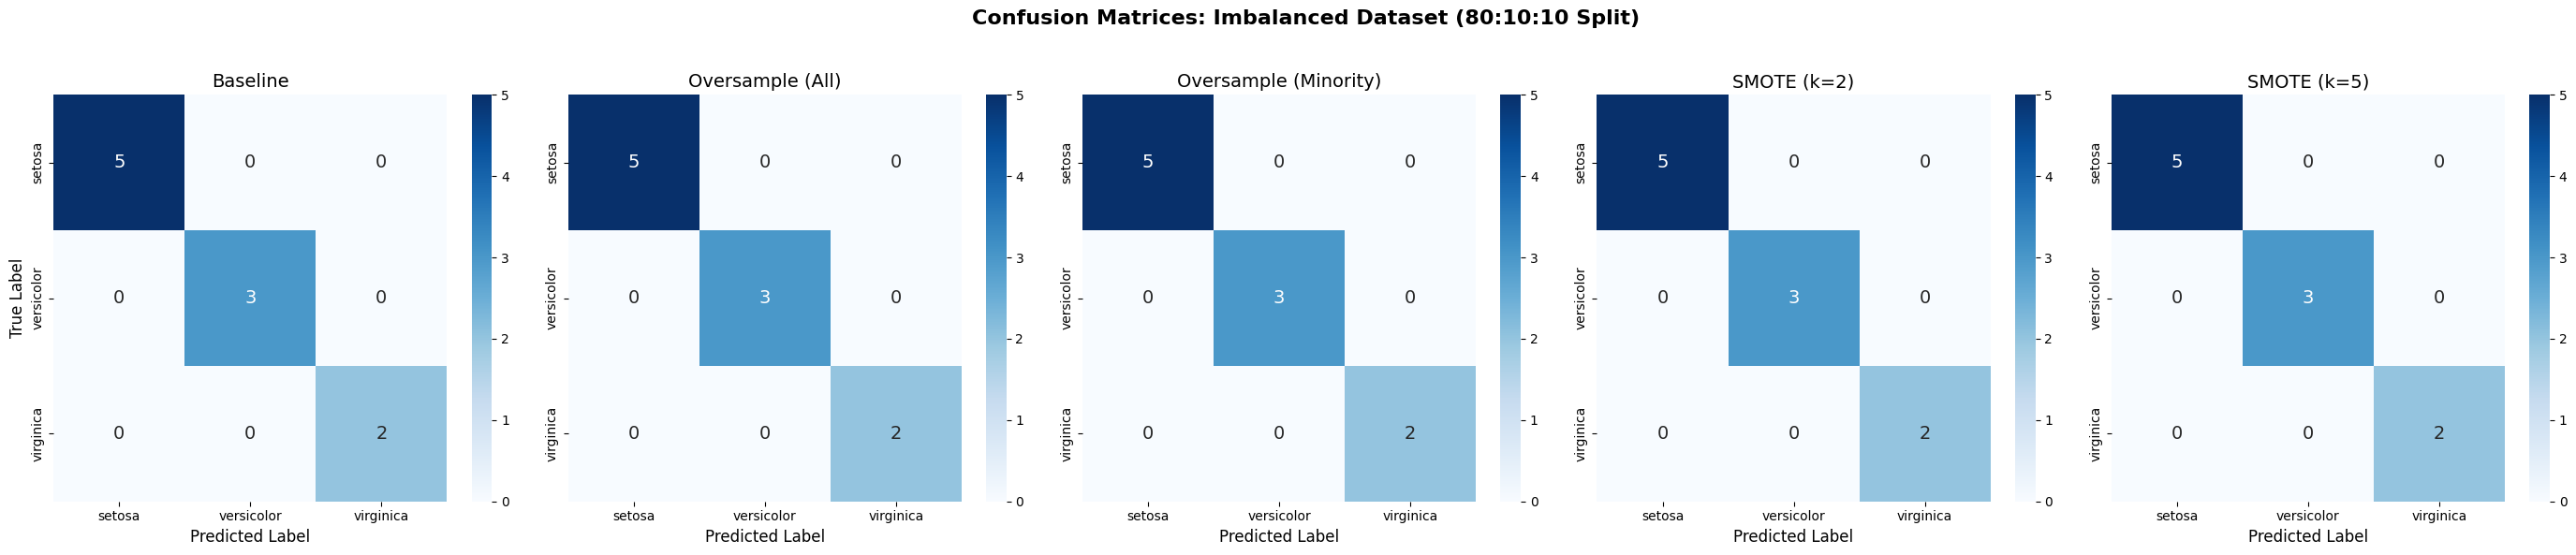

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("TASK: F1-SCORE IMPLEMENTATION FROM SCRATCH")
print("="*80)

# --- F1-SCORE IMPLEMENTATION FROM SCRATCH ---

def calculate_f1_scores_from_scratch(y_true, y_pred, target_names):
    """
    Calculates precision, recall, F1-score (per-class), and
    Macro, Micro, and Weighted F1-scores from scratch.
    """
    class_labels = sorted(list(set(y_true)))
    report = {}

    total_tp = 0
    total_fp = 0
    total_fn = 0

    f1_scores_per_class = []
    supports_per_class = []

    print("\nCustom F1-Scores (Test Set):")
    print("  " + "-"*30)

    # Calculate metrics for each class
    for label in class_labels:
        tp, fp, fn = 0, 0, 0
        for i in range(len(y_true)):
            if y_true[i] == label and y_pred[i] == label:
                tp += 1
            if y_true[i] != label and y_pred[i] == label:
                fp += 1
            if y_true[i] == label and y_pred[i] != label:
                fn += 1

        # Precision, Recall, F1-Score
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        support = tp + fn

        report[label] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        }

        # Aggregate for macro and weighted averages
        f1_scores_per_class.append(f1_score)
        supports_per_class.append(support)

        # Aggregate for micro average
        total_tp += tp
        total_fp += fp
        total_fn += fn

    # Macro F1-Score (unweighted average of F1-scores)
    macro_f1 = sum(f1_scores_per_class) / len(class_labels) if len(class_labels) > 0 else 0

    # Weighted F1-Score (weighted by support)
    total_support = sum(supports_per_class)
    weighted_f1 = sum(f1 * sup for f1, sup in zip(f1_scores_per_class, supports_per_class)) / total_support if total_support > 0 else 0

    # Micro F1-Score (calculated from global TP, FP, FN)
    micro_precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
    micro_recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall) if (micro_precision + micro_recall) > 0 else 0

    # Print per-class results
    print("  Per-Class Metrics:")
    for label in class_labels:
        metrics = report[label]
        name = target_names[label]
        print(f"    Class '{name}' (label {label}):")
        print(f"      Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1-Score: {metrics['f1-score']:.4f}, Support: {metrics['support']}")

    # Print aggregated results
    print("\n  Aggregated F1-Scores:")
    print(f"    Macro F1-Score:    {macro_f1:.4f}")
    print(f"    Micro F1-Score:    {micro_f1:.4f}")
    print(f"    Weighted F1-Score: {weighted_f1:.4f}")
    print("  " + "-"*30)

# Load the Iris dataset
print("\nLoading Iris Dataset...")
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

print(f"Original dataset shape: {X.shape}")
print(f"Original target distribution:")
original_distribution = Counter(y['species'])
for class_label, count in sorted(original_distribution.items()):
    print(f"  Class {class_label} ({iris.target_names[class_label]}): {count} samples")

# Function to create imbalanced dataset for demonstration
def create_imbalanced_dataset(X, y, imbalance_ratios=[1.0, 0.6, 0.3]):
    """
    Create an imbalanced version of the dataset
    """
    X_imbalanced = []
    y_imbalanced = []

    for class_idx, ratio in enumerate(imbalance_ratios):
        class_mask = y['species'] == class_idx
        class_X = X[class_mask]
        class_y = y[class_mask]

        n_samples = int(len(class_X) * ratio)
        indices = np.random.choice(len(class_X), n_samples, replace=False)

        X_imbalanced.append(class_X.iloc[indices])
        y_imbalanced.append(class_y.iloc[indices])

    X_imbalanced = pd.concat(X_imbalanced, ignore_index=True)
    y_imbalanced = pd.concat(y_imbalanced, ignore_index=True)

    return X_imbalanced, y_imbalanced

# Create imbalanced dataset for demonstration
print("\nCreating imbalanced dataset for demonstration...")
X_imbalanced, y_imbalanced = create_imbalanced_dataset(X, y)

print(f"Imbalanced dataset shape: {X_imbalanced.shape}")
print(f"Imbalanced target distribution:")
imbalanced_distribution = Counter(y_imbalanced['species'])
for class_label, count in sorted(imbalanced_distribution.items()):
    print(f"  Class {class_label} ({iris.target_names[class_label]}): {count} samples")

# Function to create train-validation-test splits
def create_splits(X, y, train_ratio, val_ratio, test_ratio, random_state=42):
    """Create train-validation-test splits with specified ratios"""
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=random_state, stratify=y
    )

    val_ratio_adjusted = val_ratio / (train_ratio + val_ratio)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_ratio_adjusted, random_state=random_state, stratify=y_temp
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

# Function to apply oversampling
def apply_oversampling(X_train, y_train, strategy='auto'):
    """Apply random oversampling to balance the dataset"""
    ros = RandomOverSampler(sampling_strategy=strategy, random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train.values.ravel())
    return pd.DataFrame(X_resampled, columns=X_train.columns), pd.DataFrame(y_resampled, columns=['species'])

# Function to apply SMOTE
def apply_smote(X_train, y_train, k_neighbors, strategy='auto'):
    """Apply SMOTE to balance the dataset"""
    # Ensure k_neighbors is less than the number of samples in the smallest class
    min_class_count = Counter(y_train['species']).most_common()[-1][1]
    if k_neighbors >= min_class_count:
        print(f"  Warning: k_neighbors={k_neighbors} is >= smallest class size ({min_class_count}). Adjusting k_neighbors to {min_class_count - 1}.")
        k_neighbors = min_class_count - 1

    if k_neighbors < 1:
        print(f"  Skipping SMOTE as smallest class size is too small.")
        return X_train.copy(), y_train.copy()

    smote = SMOTE(sampling_strategy=strategy, k_neighbors=k_neighbors, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train.values.ravel())
    return pd.DataFrame(X_resampled, columns=X_train.columns), pd.DataFrame(y_resampled, columns=['species'])

# Function to train and evaluate model
def train_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test, model_name):
    """Train and evaluate linear regression model"""
    print(f"\n" + "="*60)
    print(f"MODEL: {model_name}")
    print("="*60)

    # Display training set distribution
    train_dist = Counter(y_train['species'])
    print(f"Training set distribution:")
    for class_label, count in sorted(train_dist.items()):
        print(f"  Class {class_label} ({iris.target_names[class_label]}): {count} samples")

    # Flatten y arrays
    y_train_flat = y_train.values.ravel()
    y_val_flat = y_val.values.ravel()
    y_test_flat = y_test.values.ravel()

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train_flat)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Regression metrics
    train_mse = mean_squared_error(y_train_flat, y_train_pred)
    val_mse = mean_squared_error(y_val_flat, y_val_pred)
    test_mse = mean_squared_error(y_test_flat, y_test_pred)

    train_r2 = r2_score(y_train_flat, y_train_pred)
    val_r2 = r2_score(y_val_flat, y_val_pred)
    test_r2 = r2_score(y_test_flat, y_test_pred)

    print(f"\nRegression Metrics:")
    print(f"Training   - MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
    print(f"Validation - MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
    print(f"Test       - MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

    # Classification metrics (rounded predictions)
    y_train_pred_class = np.clip(np.round(y_train_pred).astype(int), 0, 2)
    y_val_pred_class = np.clip(np.round(y_val_pred).astype(int), 0, 2)
    y_test_pred_class = np.clip(np.round(y_test_pred).astype(int), 0, 2)

    train_acc = accuracy_score(y_train_flat, y_train_pred_class)
    val_acc = accuracy_score(y_val_flat, y_val_pred_class)
    test_acc = accuracy_score(y_test_flat, y_test_pred_class)

    print(f"\nClassification Metrics (rounded predictions):")
    print(f"Training   - Accuracy: {train_acc:.4f}")
    print(f"Validation - Accuracy: {val_acc:.4f}")
    print(f"Test       - Accuracy: {test_acc:.4f}")

    # Use the custom F1 score implementation
    calculate_f1_scores_from_scratch(y_test_flat, y_test_pred_class, iris.target_names)

    return model, {
        'train_mse': train_mse, 'val_mse': val_mse, 'test_mse': test_mse,
        'train_r2': train_r2, 'val_r2': val_r2, 'test_r2': test_r2,
        'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc,
        'y_test_pred': y_test_pred, 'y_test_actual': y_test_flat,
        'train_dist': train_dist
    }

# Experiment with different datasets and splits
results = {}
datasets = {
    'Original_Balanced': (X, y),
    'Imbalanced': (X_imbalanced, y_imbalanced)
}

splits = {
    '80:10:10': (0.8, 0.1, 0.1),
    '70:15:15': (0.7, 0.15, 0.15)
}

print("\n" + "="*80)
print("EXPERIMENTS WITH DIFFERENT CONFIGURATIONS")
print("="*80)

for dataset_name, (X_data, y_data) in datasets.items():
    print(f"\nDataset: {dataset_name}")
    print("-" * 40)

    for split_name, (train_ratio, val_ratio, test_ratio) in splits.items():
        print(f"\nSplit: {split_name}")

        # Create splits
        X_train, X_val, X_test, y_train, y_val, y_test = create_splits(
            X_data, y_data, train_ratio, val_ratio, test_ratio
        )

        # 1. Baseline model (no oversampling)
        model_baseline, metrics_baseline = train_evaluate_model(
            X_train, X_val, X_test, y_train, y_val, y_test,
            f"{dataset_name}_{split_name}_Baseline"
        )

        # 2. Random oversampling - balance all classes
        X_train_over_all, y_train_over_all = apply_oversampling(X_train, y_train, strategy='auto')
        model_over_all, metrics_over_all = train_evaluate_model(
            X_train_over_all, X_val, X_test, y_train_over_all, y_val, y_test,
            f"{dataset_name}_{split_name}_Oversample_All"
        )

        # 3. Random oversampling - balance only minority classes
        X_train_over_min, y_train_over_min = apply_oversampling(X_train, y_train, strategy='not majority')
        model_over_min, metrics_over_min = train_evaluate_model(
            X_train_over_min, X_val, X_test, y_train_over_min, y_val, y_test,
            f"{dataset_name}_{split_name}_Oversample_Minority"
        )

        # 4. SMOTE with k_neighbors=2
        X_train_smote_k2, y_train_smote_k2 = apply_smote(X_train, y_train, k_neighbors=2)
        model_smote_k2, metrics_smote_k2 = train_evaluate_model(
            X_train_smote_k2, X_val, X_test, y_train_smote_k2, y_val, y_test,
            f"{dataset_name}_{split_name}_SMOTE_k2"
        )

        # 5. SMOTE with k_neighbors=5 (default-like)
        X_train_smote_k5, y_train_smote_k5 = apply_smote(X_train, y_train, k_neighbors=5)
        model_smote_k5, metrics_smote_k5 = train_evaluate_model(
            X_train_smote_k5, X_val, X_test, y_train_smote_k5, y_val, y_test,
            f"{dataset_name}_{split_name}_SMOTE_k5"
        )

        # Store results
        key = f"{dataset_name}_{split_name}"
        results[key] = {
            'baseline': metrics_baseline,
            'oversample_all': metrics_over_all,
            'oversample_minority': metrics_over_min,
            'smote_k2': metrics_smote_k2,
            'smote_k5': metrics_smote_k5
        }

# Create comprehensive comparison
print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE COMPARISON")
print("="*80)

# Create comparison DataFrame
comparison_data = []
for key, methods in results.items():
    dataset_name, split_name = key.split('_', 1)

    for method_name, metrics in methods.items():
        comparison_data.append({
            'Dataset': dataset_name,
            'Split': split_name,
            'Method': method_name,
            'Test_R2': metrics['test_r2'],
            'Test_Accuracy': metrics['test_acc'],
            'Test_MSE': metrics['test_mse'],
            'Val_R2': metrics['val_r2'],
            'Val_Accuracy': metrics['val_acc']
        })

comparison_df = pd.DataFrame(comparison_data)
print("\nDetailed Results Table:")
print(comparison_df.round(4))

# --- VISUALIZATION ---

# 1. Bar plots for performance comparison
print("\nGenerating performance comparison plots...")
fig, axes = plt.subplots(3, 4, figsize=(24, 16))
fig.suptitle('Task 2: Oversampling Techniques Comparison (including SMOTE)', fontsize=20, fontweight='bold')

metrics_to_plot = ['Test_Accuracy', 'Test_R2', 'Test_MSE']
y_labels = ['Test Accuracy', 'Test R² Score', 'Test Mean Squared Error']
col_idx = 0

for dataset_name in datasets.keys():
    for split_name in splits.keys():
        # Filter data for the current dataset and split
        subset_df = comparison_df[(comparison_df['Dataset'] == dataset_name) & (comparison_df['Split'] == split_name)]

        if subset_df.empty:
            continue

        for row_idx, (metric, y_label) in enumerate(zip(metrics_to_plot, y_labels)):
            ax = axes[row_idx, col_idx]
            sns.barplot(x='Method', y=metric, data=subset_df, ax=ax, palette='viridis', hue='Method', legend=False)
            ax.set_title(f'{y_label}\n({dataset_name} - Split {split_name})', fontsize=12)
            ax.set_xlabel('Oversampling Method', fontsize=10)
            ax.set_ylabel(y_label.split(' ')[-1], fontsize=10)
            ax.tick_params(axis='x', rotation=25, labelsize=9)

            # Set y-axis limits for better comparison across plots
            if 'Accuracy' in metric:
                ax.set_ylim(0, 1.05)
            elif 'R2' in metric:
                min_r2 = min(0, comparison_df[metric].min())
                ax.set_ylim(min_r2 - 0.1, 1.05)
        col_idx += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()


# 2. Confusion Matrices for a specific, insightful case
print("\n" + "="*80)
print("CONFUSION MATRIX VISUALIZATION (Imbalanced Dataset, 80:10:10 Split)")
print("="*80)

key = 'Imbalanced_80:10:10'
if key in results:
    fig_cm, axes_cm = plt.subplots(1, 5, figsize=(28, 6))
    fig_cm.suptitle('Confusion Matrices: Imbalanced Dataset (80:10:10 Split)', fontsize=16, fontweight='bold')

    methods = ['baseline', 'oversample_all', 'oversample_minority', 'smote_k2', 'smote_k5']
    titles = ['Baseline', 'Oversample (All)', 'Oversample (Minority)', 'SMOTE (k=2)', 'SMOTE (k=5)']

    for i, (method, title) in enumerate(zip(methods, titles)):
        y_true = results[key][method]['y_test_actual']
        y_pred = np.clip(np.round(results[key][method]['y_test_pred']).astype(int), 0, 2)

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=iris.target_names,
                    yticklabels=iris.target_names,
                    ax=axes_cm[i], annot_kws={"size": 14})

        axes_cm[i].set_title(title, fontsize=14)
        axes_cm[i].set_xlabel('Predicted Label', fontsize=12)
        if i == 0:
            axes_cm[i].set_ylabel('True Label', fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print(f"Results for '{key}' not found, skipping confusion matrix visualization.")



TASK: F1-SCORE, ACCURACY, and ROC/AUC IMPLEMENTATION FROM SCRATCH

Loading Iris Dataset...

MODEL: Original_Balanced_80:10:10_Baseline
Training set distribution: [(0, 40), (1, 40), (2, 39)]

Regression Metrics:
  Training   - MSE: 0.0439, R²: 0.9339
  Validation - MSE: 0.0535, R²: 0.9218
  Test       - MSE: 0.0658, R²: 0.9014

Classification Metrics (rounded predictions):
  Training   - Accuracy: 0.9748
  Validation - Accuracy: 0.9375
  Test       - Accuracy: 0.9333

Custom F1-Scores (Test Set):
  ------------------------------
  Per-Class Metrics:
    Class 'setosa': P: 1.00, R: 1.00, F1: 1.00, Support: 5
    Class 'versicolor': P: 0.83, R: 1.00, F1: 0.91, Support: 5
    Class 'virginica': P: 1.00, R: 0.80, F1: 0.89, Support: 5

  Aggregated F1-Scores:
    Macro F1-Score:    0.9327, Micro F1-Score:    0.9333, Weighted F1-Score: 0.9327
  ------------------------------

MODEL: Original_Balanced_80:10:10_Oversample_All
Training set distribution: [(0, 40), (1, 40), (2, 40)]

Regression Me

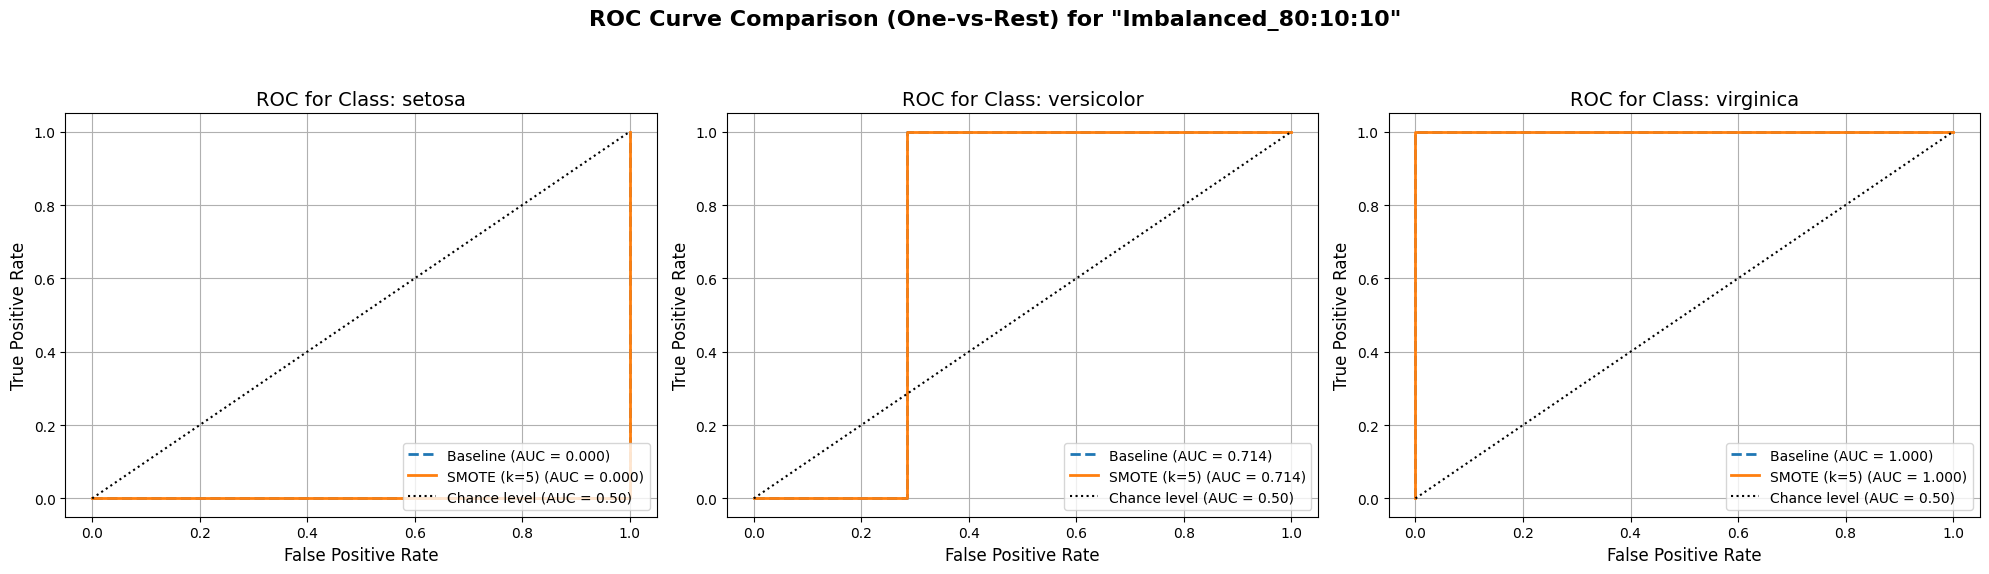

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("TASK: F1-SCORE, ACCURACY, and ROC/AUC IMPLEMENTATION FROM SCRATCH")
print("="*80)

# --- METRICS IMPLEMENTATION FROM SCRATCH ---

def calculate_accuracy_from_scratch(y_true, y_pred):
    """Calculates accuracy from scratch."""
    correct_predictions = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct_predictions += 1
    return correct_predictions / len(y_true) if len(y_true) > 0 else 0

def calculate_f1_scores_from_scratch(y_true, y_pred, target_names):
    """
    Calculates precision, recall, F1-score (per-class), and
    Macro, Micro, and Weighted F1-scores from scratch.
    """
    class_labels = sorted(list(set(y_true)))
    report = {}

    total_tp, total_fp, total_fn = 0, 0, 0
    f1_scores_per_class, supports_per_class = [], []

    print("\nCustom F1-Scores (Test Set):")
    print("  " + "-"*30)

    # Calculate metrics for each class
    for label in class_labels:
        tp, fp, fn = 0, 0, 0
        for i in range(len(y_true)):
            if y_true[i] == label and y_pred[i] == label:
                tp += 1
            if y_true[i] != label and y_pred[i] == label:
                fp += 1
            if y_true[i] == label and y_pred[i] != label:
                fn += 1

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = tp + fn

        report[label] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': support}
        f1_scores_per_class.append(f1_score)
        supports_per_class.append(support)
        total_tp, total_fp, total_fn = total_tp + tp, total_fp + fp, total_fn + fn

    # Macro, Weighted, and Micro F1-Scores
    macro_f1 = sum(f1_scores_per_class) / len(class_labels) if class_labels else 0
    total_support = sum(supports_per_class)
    weighted_f1 = sum(f1 * sup for f1, sup in zip(f1_scores_per_class, supports_per_class)) / total_support if total_support > 0 else 0
    micro_precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
    micro_recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall) if (micro_precision + micro_recall) > 0 else 0

    print("  Per-Class Metrics:")
    for label in class_labels:
        metrics = report[label]
        name = target_names[label]
        print(f"    Class '{name}': P: {metrics['precision']:.2f}, R: {metrics['recall']:.2f}, F1: {metrics['f1-score']:.2f}, Support: {metrics['support']}")

    print("\n  Aggregated F1-Scores:")
    print(f"    Macro F1-Score:    {macro_f1:.4f}, Micro F1-Score:    {micro_f1:.4f}, Weighted F1-Score: {weighted_f1:.4f}")
    print("  " + "-"*30)

def calculate_roc_auc_from_scratch(y_true, y_pred_scores, class_idx):
    """
    Computes TPR, FPR, and AUC for a single class (One-vs-Rest) from scratch.
    """
    # Create binary labels for the current class
    y_true_binary = [1 if label == class_idx else 0 for label in y_true]

    # Sort scores and true labels together to generate thresholds
    desc_score_indices = np.argsort(y_pred_scores)[::-1]
    y_pred_scores_sorted = y_pred_scores[desc_score_indices]
    y_true_binary_sorted = np.array(y_true_binary)[desc_score_indices]

    # Calculate TPR and FPR at each threshold
    tpr_list, fpr_list = [0.0], [0.0]
    tp, fp = 0, 0
    P = sum(y_true_binary)
    N = len(y_true_binary) - P

    for i in range(len(y_pred_scores_sorted)):
        if y_true_binary_sorted[i] == 1:
            tp += 1
        else:
            fp += 1
        tpr_list.append(tp / P if P > 0 else 0)
        fpr_list.append(fp / N if N > 0 else 0)

    # Calculate AUC using the trapezoidal rule
    auc = 0.0
    for i in range(len(fpr_list) - 1):
        auc += (fpr_list[i+1] - fpr_list[i]) * (tpr_list[i+1] + tpr_list[i]) / 2

    return fpr_list, tpr_list, auc

def plot_comparison_roc_curves(results_dict, target_names, key):
    """
    Plots a comparison of ROC curves for baseline vs. a treated model.
    """
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'ROC Curve Comparison (One-vs-Rest) for "{key}"', fontsize=16, fontweight='bold')

    models_to_compare = {
        'Baseline': results_dict[key]['baseline'],
        'SMOTE (k=5)': results_dict[key]['smote_k5']
    }

    for class_idx, class_name in enumerate(target_names):
        ax = axes[class_idx]

        for model_name, metrics in models_to_compare.items():
            y_true = metrics['y_test_actual']
            y_pred_scores = metrics['y_test_pred_scores']

            fpr, tpr, auc = calculate_roc_auc_from_scratch(y_true, y_pred_scores, class_idx)

            print(f"  AUC for '{model_name}' on class '{class_name}': {auc:.4f}")

            linestyle = '--' if model_name == 'Baseline' else '-'
            ax.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})', linestyle=linestyle, lw=2)

        ax.plot([0, 1], [0, 1], 'k:', label='Chance level (AUC = 0.50)')
        ax.set_xlabel('False Positive Rate', fontsize=12)
        ax.set_ylabel('True Positive Rate', fontsize=12)
        ax.set_title(f'ROC for Class: {class_name}', fontsize=14)
        ax.legend(loc='lower right')
        ax.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()

# Load the Iris dataset
print("\nLoading Iris Dataset...")
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

# Function to create imbalanced dataset for demonstration
def create_imbalanced_dataset(X, y, imbalance_ratios=[1.0, 0.6, 0.3]):
    X_imbalanced, y_imbalanced = [], []
    for class_idx, ratio in enumerate(imbalance_ratios):
        class_mask = y['species'] == class_idx
        class_X, class_y = X[class_mask], y[class_mask]
        n_samples = int(len(class_X) * ratio)
        indices = np.random.choice(len(class_X), n_samples, replace=False)
        X_imbalanced.append(class_X.iloc[indices])
        y_imbalanced.append(class_y.iloc[indices])
    return pd.concat(X_imbalanced, ignore_index=True), pd.concat(y_imbalanced, ignore_index=True)

# Create imbalanced dataset
X_imbalanced, y_imbalanced = create_imbalanced_dataset(X, y)

# Function to create train-validation-test splits
def create_splits(X, y, train_ratio, val_ratio, test_ratio, random_state=42):
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_ratio, random_state=random_state, stratify=y)
    val_ratio_adj = val_ratio / (train_ratio + val_ratio)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_ratio_adj, random_state=random_state, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Oversampling functions
def apply_oversampling(X_train, y_train, strategy='auto'):
    ros = RandomOverSampler(sampling_strategy=strategy, random_state=42)
    X_res, y_res = ros.fit_resample(X_train, y_train.values.ravel())
    return pd.DataFrame(X_res, columns=X_train.columns), pd.DataFrame(y_res, columns=['species'])

def apply_smote(X_train, y_train, k_neighbors, strategy='auto'):
    min_class_count = Counter(y_train['species']).most_common()[-1][1]
    k = min(k_neighbors, min_class_count - 1)
    if k < 1: return X_train.copy(), y_train.copy()
    smote = SMOTE(sampling_strategy=strategy, k_neighbors=k, random_state=42)
    X_res, y_res = smote.fit_resample(X_train, y_train.values.ravel())
    return pd.DataFrame(X_res, columns=X_train.columns), pd.DataFrame(y_res, columns=['species'])

# --- MODEL TRAINING & EVALUATION ---
def train_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test, model_name):
    print(f"\n" + "="*60 + f"\nMODEL: {model_name}\n" + "="*60)
    train_dist = Counter(y_train['species'])
    print(f"Training set distribution: {sorted(train_dist.items())}")

    y_train_flat, y_val_flat, y_test_flat = y_train.values.ravel(), y_val.values.ravel(), y_test.values.ravel()

    model = LinearRegression()
    model.fit(X_train, y_train_flat)

    y_train_pred, y_val_pred, y_test_pred = model.predict(X_train), model.predict(X_val), model.predict(X_test)

    train_mse, val_mse, test_mse = mean_squared_error(y_train_flat, y_train_pred), mean_squared_error(y_val_flat, y_val_pred), mean_squared_error(y_test_flat, y_test_pred)
    train_r2, val_r2, test_r2 = r2_score(y_train_flat, y_train_pred), r2_score(y_val_flat, y_val_pred), r2_score(y_test_flat, y_test_pred)

    print(f"\nRegression Metrics:")
    print(f"  Training   - MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
    print(f"  Validation - MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
    print(f"  Test       - MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

    y_train_pred_class = np.clip(np.round(y_train_pred).astype(int), 0, 2)
    y_val_pred_class = np.clip(np.round(y_val_pred).astype(int), 0, 2)
    y_test_pred_class = np.clip(np.round(y_test_pred).astype(int), 0, 2)

    train_acc = calculate_accuracy_from_scratch(y_train_flat, y_train_pred_class)
    val_acc = calculate_accuracy_from_scratch(y_val_flat, y_val_pred_class)
    test_acc = calculate_accuracy_from_scratch(y_test_flat, y_test_pred_class)

    print(f"\nClassification Metrics (rounded predictions):")
    print(f"  Training   - Accuracy: {train_acc:.4f}")
    print(f"  Validation - Accuracy: {val_acc:.4f}")
    print(f"  Test       - Accuracy: {test_acc:.4f}")

    calculate_f1_scores_from_scratch(y_test_flat, y_test_pred_class, iris.target_names)

    return model, {
        'train_mse': train_mse, 'val_mse': val_mse, 'test_mse': test_mse,
        'train_r2': train_r2, 'val_r2': val_r2, 'test_r2': test_r2,
        'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc,
        'y_test_pred_scores': y_test_pred, 'y_test_actual': y_test_flat
    }

# --- EXPERIMENT EXECUTION ---
results = {}
datasets = {'Original_Balanced': (X, y), 'Imbalanced': (X_imbalanced, y_imbalanced)}
splits = {'80:10:10': (0.8, 0.1, 0.1), '70:15:15': (0.7, 0.15, 0.15)}

for dataset_name, (X_data, y_data) in datasets.items():
    for split_name, (train_r, val_r, test_r) in splits.items():
        X_train, X_val, X_test, y_train, y_val, y_test = create_splits(X_data, y_data, train_r, val_r, test_r)

        key = f"{dataset_name}_{split_name}"
        results[key] = {}

        # Baseline
        _, metrics = train_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test, f"{key}_Baseline")
        results[key]['baseline'] = metrics

        # Random Oversampling
        X_tr_over, y_tr_over = apply_oversampling(X_train, y_train)
        _, metrics = train_evaluate_model(X_tr_over, X_val, X_test, y_tr_over, y_val, y_test, f"{key}_Oversample_All")
        results[key]['oversample_all'] = metrics

        # SMOTE k=5
        X_tr_smote, y_tr_smote = apply_smote(X_train, y_train, k_neighbors=5)
        _, metrics = train_evaluate_model(X_tr_smote, X_val, X_test, y_tr_smote, y_val, y_test, f"{key}_SMOTE_k5")
        results[key]['smote_k5'] = metrics

# --- VISUALIZATION ---
print("\n" + "="*80)
print("VISUALIZATION OF RESULTS")
print("="*80)

# 1. ROC Curve and AUC Visualization for the most interesting case
key = 'Imbalanced_80:10:10'
print(f"\nGenerating ROC Curves and AUC values for '{key}' case...")

if key in results:
    plot_comparison_roc_curves(results, iris.target_names, key)
else:
    print(f"Results for '{key}' not found, skipping ROC visualization.")



TASK: LINEAR REGRESSION & METRICS FROM SCRATCH

MODEL: Imbalanced_80:10:10_Baseline

Regression Metrics (Test Set, from scratch):
  MAE: 0.1283, MSE: 0.0320, R²: 0.9476

Classification Metrics (Test Set, from scratch):
  Accuracy: 1.0000

Custom F1-Scores (Test Set):
  ------------------------------

  Aggregated F1-Scores: Macro=1.0000, Micro=1.0000, Weighted=1.0000
  ------------------------------

MODEL: Imbalanced_80:10:10_SMOTE_k5

Regression Metrics (Test Set, from scratch):
  MAE: 0.1355, MSE: 0.0341, R²: 0.9441

Classification Metrics (Test Set, from scratch):
  Accuracy: 1.0000

Custom F1-Scores (Test Set):
  ------------------------------

  Aggregated F1-Scores: Macro=1.0000, Micro=1.0000, Weighted=1.0000
  ------------------------------

VISUALIZATION OF RESULTS
Generating ROC Curves and AUC values for 'Imbalanced_80:10:10' case...
  AUC for 'Baseline' on class 'setosa': 0.0000
  AUC for 'SMOTE (k=5)' on class 'setosa': 0.0000
  AUC for 'Baseline' on class 'versicolor': 0.7

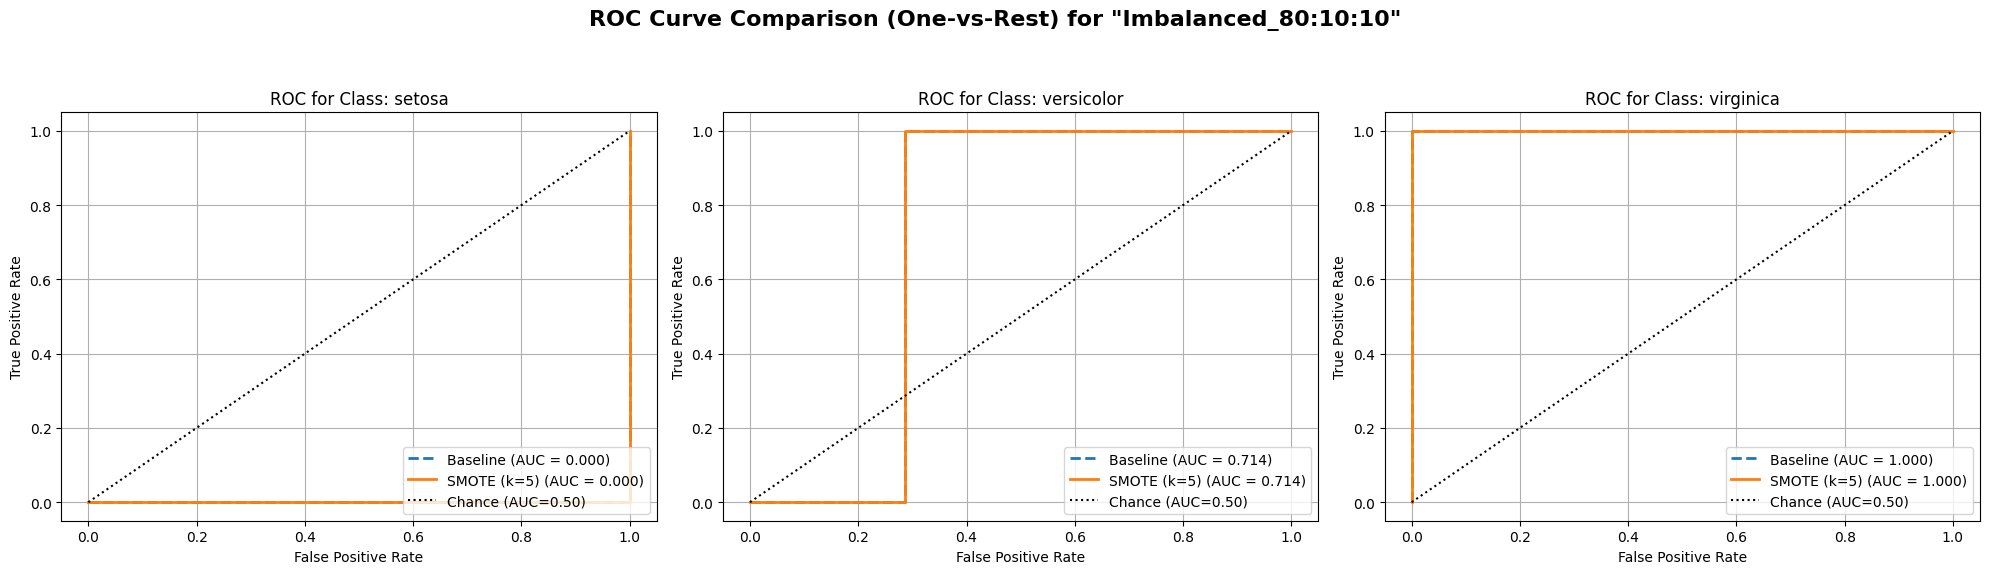

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("TASK: LINEAR REGRESSION & METRICS FROM SCRATCH")
print("="*80)

# --- MODEL IMPLEMENTATION FROM SCRATCH ---

class LinearRegressionFromScratch:
    """
    Linear Regression model implemented from scratch using the Normal Equation.
    """
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        """
        Trains the model using the Normal Equation.
        theta = (X_b^T * X_b)^-1 * X_b^T * y
        """
        # Add intercept term (x0=1) to the feature matrix
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Calculate theta using the Normal Equation
        # Using np.linalg.pinv (Moore-Penrose inverse) for numerical stability
        try:
            self.theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
        except np.linalg.LinAlgError:
            print("Error: Could not compute the inverse of the matrix. It may be singular.")
            self.theta = None

    def predict(self, X):
        """
        Makes predictions using the learned parameters (theta).
        """
        if self.theta is None:
            raise ValueError("Model has not been trained yet. Call fit() first.")

        # Add intercept term (x0=1) to the feature matrix
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        return X_b @ self.theta

# --- METRICS IMPLEMENTATION FROM SCRATCH ---

def calculate_mae_from_scratch(y_true, y_pred):
    """Calculates Mean Absolute Error from scratch."""
    return np.mean(np.abs(y_true - y_pred))

def calculate_mse_from_scratch(y_true, y_pred):
    """Calculates Mean Squared Error from scratch."""
    return np.mean((y_true - y_pred)**2)

def calculate_r2_from_scratch(y_true, y_pred):
    """Calculates R-squared (R²) score from scratch."""
    ss_res = np.sum((y_true - y_pred)**2)  # Sum of squares of residuals
    ss_tot = np.sum((y_true - np.mean(y_true))**2)  # Total sum of squares
    return 1 - (ss_res / ss_tot)

def calculate_accuracy_from_scratch(y_true, y_pred):
    """Calculates accuracy from scratch."""
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true) if len(y_true) > 0 else 0

def calculate_f1_scores_from_scratch(y_true, y_pred, target_names):
    """
    Calculates precision, recall, F1-score (per-class), and
    Macro, Micro, and Weighted F1-scores from scratch.
    """
    class_labels = sorted(list(set(y_true)))
    report = {}
    total_tp, total_fp, total_fn = 0, 0, 0
    f1_scores_per_class, supports_per_class = [], []

    print("\nCustom F1-Scores (Test Set):")
    print("  " + "-"*30)

    for label in class_labels:
        tp = np.sum((y_true == label) & (y_pred == label))
        fp = np.sum((y_true != label) & (y_pred == label))
        fn = np.sum((y_true == label) & (y_pred != label))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = tp + fn

        report[label] = {'f1-score': f1_score, 'support': support}
        f1_scores_per_class.append(f1_score)
        supports_per_class.append(support)
        total_tp, total_fp, total_fn = total_tp + tp, total_fp + fp, total_fn + fn

    macro_f1 = np.mean(f1_scores_per_class) if class_labels else 0
    weighted_f1 = np.average(f1_scores_per_class, weights=supports_per_class) if np.sum(supports_per_class) > 0 else 0
    micro_precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
    micro_recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall) if (micro_precision + micro_recall) > 0 else 0

    print(f"\n  Aggregated F1-Scores: Macro={macro_f1:.4f}, Micro={micro_f1:.4f}, Weighted={weighted_f1:.4f}")
    print("  " + "-"*30)

def calculate_roc_auc_from_scratch(y_true, y_pred_scores, class_idx):
    y_true_binary = (y_true == class_idx).astype(int)
    desc_score_indices = np.argsort(y_pred_scores)[::-1]
    y_scores_sorted = y_pred_scores[desc_score_indices]
    y_true_sorted = y_true_binary[desc_score_indices]

    tpr_list, fpr_list = [0.0], [0.0]
    P, N = np.sum(y_true_sorted), len(y_true_sorted) - np.sum(y_true_sorted)
    tp, fp = 0, 0

    for i in range(len(y_scores_sorted)):
        if y_true_sorted[i] == 1: tp += 1
        else: fp += 1
        tpr_list.append(tp / P if P > 0 else 0)
        fpr_list.append(fp / N if N > 0 else 0)

    auc = np.trapz(tpr_list, fpr_list)
    return fpr_list, tpr_list, auc

def plot_comparison_roc_curves(results_dict, target_names, key):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'ROC Curve Comparison (One-vs-Rest) for "{key}"', fontsize=16, fontweight='bold')
    models_to_compare = {'Baseline': results_dict[key]['baseline'], 'SMOTE (k=5)': results_dict[key]['smote_k5']}

    for class_idx, class_name in enumerate(target_names):
        ax = axes[class_idx]
        for model_name, metrics in models_to_compare.items():
            fpr, tpr, auc = calculate_roc_auc_from_scratch(metrics['y_test_actual'], metrics['y_test_pred_scores'], class_idx)
            print(f"  AUC for '{model_name}' on class '{class_name}': {auc:.4f}")
            ax.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})', linestyle='--' if 'Base' in model_name else '-', lw=2)
        ax.plot([0, 1], [0, 1], 'k:', label='Chance (AUC=0.50)')
        ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title=f'ROC for Class: {class_name}')
        ax.legend(loc='lower right')
        ax.grid(True)
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()

# --- DATA PREP AND EXPERIMENT SETUP (UNCHANGED) ---
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

def create_imbalanced_dataset(X, y, ratios=[1.0, 0.6, 0.3]):
    # ... (implementation unchanged)
    X_imb, y_imb = [], []
    for i, r in enumerate(ratios):
        mask = y['species'] == i
        n = int(np.sum(mask) * r)
        indices = np.random.choice(np.where(mask)[0], n, replace=False)
        X_imb.append(X.iloc[indices])
        y_imb.append(y.iloc[indices])
    return pd.concat(X_imb), pd.concat(y_imb)

X_imbalanced, y_imbalanced = create_imbalanced_dataset(X, y)

def create_splits(X, y, train_r=0.7, val_r=0.15, test_r=0.15, seed=42):
    # ... (implementation unchanged)
    X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=test_r, random_state=seed, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=val_r/(train_r+val_r), random_state=seed, stratify=y_tmp)
    return X_train, X_val, X_test, y_train, y_val, y_test

def apply_smote(X_train, y_train, k=5):
    # ... (implementation unchanged)
    min_class = Counter(y_train['species']).most_common()[-1][1]
    k_adj = min(k, min_class - 1)
    if k_adj < 1: return X_train.copy(), y_train.copy()
    sm = SMOTE(k_neighbors=k_adj, random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train.values.ravel())
    return pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['species'])

# --- MODEL TRAINING & EVALUATION (UPDATED) ---
def train_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test, model_name):
    print(f"\n" + "="*60 + f"\nMODEL: {model_name}\n" + "="*60)
    y_train_flat, y_val_flat, y_test_flat = y_train.values.ravel(), y_val.values.ravel(), y_test.values.ravel()

    model = LinearRegressionFromScratch() # Use from-scratch model
    model.fit(X_train, y_train_flat)

    y_train_pred, y_val_pred, y_test_pred = model.predict(X_train), model.predict(X_val), model.predict(X_test)

    # Use from-scratch metrics
    test_mae = calculate_mae_from_scratch(y_test_flat, y_test_pred)
    test_mse = calculate_mse_from_scratch(y_test_flat, y_test_pred)
    test_r2 = calculate_r2_from_scratch(y_test_flat, y_test_pred)

    print(f"\nRegression Metrics (Test Set, from scratch):")
    print(f"  MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

    y_test_pred_class = np.clip(np.round(y_test_pred).astype(int), 0, 2)
    test_acc = calculate_accuracy_from_scratch(y_test_flat, y_test_pred_class)

    print(f"\nClassification Metrics (Test Set, from scratch):")
    print(f"  Accuracy: {test_acc:.4f}")

    calculate_f1_scores_from_scratch(y_test_flat, y_test_pred_class, iris.target_names)

    return model, {'y_test_pred_scores': y_test_pred, 'y_test_actual': y_test_flat}

# --- EXPERIMENT EXECUTION (UNCHANGED) ---
results = {}
key = 'Imbalanced_80:10:10'
X_train, X_val, X_test, y_train, y_val, y_test = create_splits(X_imbalanced, y_imbalanced, 0.8, 0.1, 0.1)
results[key] = {}
_, metrics_base = train_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test, f"{key}_Baseline")
results[key]['baseline'] = metrics_base
X_tr_smote, y_tr_smote = apply_smote(X_train, y_train)
_, metrics_smote = train_evaluate_model(X_tr_smote, X_val, X_test, y_tr_smote, y_val, y_test, f"{key}_SMOTE_k5")
results[key]['smote_k5'] = metrics_smote

# --- VISUALIZATION (UNCHANGED) ---
print("\n" + "="*80 + "\nVISUALIZATION OF RESULTS\n" + "="*80)
print(f"Generating ROC Curves and AUC values for '{key}' case...")
plot_comparison_roc_curves(results, iris.target_names, key)

